In [18]:
import numpy as np
import pandas as pd
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

### 데이터 불러오기

In [25]:
df_path = './210721_기업텍스트분석.xlsx'

df = pd.read_excel(df_path, sheet_name=0)
df

,NO,SQ1,Q9t1
0,1000004,1,비정규직보다는 정규직채용을 해주시고 많은 복리후생을 챙겨주세요
1,1000006,1,경제억압개선
2,1000003,1,소비자 중심의 생각
3,1000009,2,없음
4,1000013,2,경제발전에 큰 기여를 하도록 힘써야한다고 생각한다.
...,...,...,...
9565,1011600,1,코로나 극복을 위해 경제활성화에 앞서주고 환경오염(과대포장 등)을 덜 하도록 노력하...
9566,1011604,1,높은 경제적 지위를 이용해 낙하산식 인사 운영 분식회계 등 비리를 척결하고 공정한...
9567,1011607,1,불이익 요소 금지
9568,1011609,1,청년들의 일자리가 부족하다. 채용을 늘렸아면 좋겠다


### 텍스트 전처리 함수

In [24]:
# 특수기호 제거
def text_preprocessing(text):
    sentence = text.split(' ')
    prepro_sentence = []
    for word in sentence:
        prepro_word = re.sub(r'[^가-힣0-9a-zA-Z]', ' ', word)
        prepro_sentence.append(prepro_word)
    result = ' '.join(prepro_sentence)
    return result

# okt 형태소 분석기 토크나이징
def tokenize(text):
    okt = Okt()
    tokens = okt.pos(text)
    total_words = []
    for word, tag in tokens:
        if tag not in ['Josa']:
            total_words.append(word)
    result = ' '.join(total_words)
    return result

### 텍스트 전처리

In [26]:
df['Q9t1'] = df['Q9t1'].map(text_preprocessing)
df

,NO,SQ1,Q9t1
0,1000004,1,비정규직보다는 정규직채용을 해주시고 많은 복리후생을 챙겨주세요
1,1000006,1,경제억압개선
2,1000003,1,소비자 중심의 생각
3,1000009,2,없음
4,1000013,2,경제발전에 큰 기여를 하도록 힘써야한다고 생각한다
...,...,...,...
9565,1011600,1,코로나 극복을 위해 경제활성화에 앞서주고 환경오염 과대포장 등 을 덜 하도록 노력하...
9566,1011604,1,높은 경제적 지위를 이용해 낙하산식 인사 운영 분식회계 등 비리를 척결하고 공정한...
9567,1011607,1,불이익 요소 금지
9568,1011609,1,청년들의 일자리가 부족하다 채용을 늘렸아면 좋겠다


In [15]:
df['Q9t1'] = df['Q9t1'].map(tokenize)
df

,NO,SQ1,Q9t1
0,1000004,1,비정규직 정규직 채용 해주시 많은 복리 후생 챙겨주세요
1,1000006,1,경제 억압 개선
2,1000003,1,소비자 중심 생각
3,1000009,2,없음
4,1000013,2,경 제 발전 큰 기여 하도록 힘써 야한다고 생각 한다
...,...,...,...
9565,1011600,1,코로나 극복 위해 경 제 활성화 앞서주고 환경오염 과대 포장 등 덜 하도록 노력 하...
9566,1011604,1,높은 경제 적 지위 이용 해 낙하산 식 인사 운영 분식회계 등 비리 척 결하 공정한...
9567,1011607,1,불이익 요소 금지
9568,1011609,1,청년 들 일자리 부족하다 채용 늘렸아면 좋겠다


In [11]:
df['Q9t1'] = df['Q9t1'].map(tokenize)
df

,NO,SQ1,Q9t1
0,1000004,1,비정규직 정규직 채용 해주시 많다 복리 후생 챙기다
1,1000006,1,경제 억압 개선
2,1000003,1,소비자 중심 생각
3,1000009,2,없다
4,1000013,2,경 제 발전 크다 기여 하다 힘쓰다 야하다 생각 하다
...,...,...,...
9565,1011600,1,코로나 극복 위해 경 제 활성화 앞서다 환경오염 과대 포장 등 덜 하다 노력 하다 ...
9566,1011604,1,높다 경제 적 지위 이용 하다 낙하산 식 인사 운영 분식회계 등 비리 척 결하 공정...
9567,1011607,1,불이익 요소 금지
9568,1011609,1,청년 들 일자리 부족하다 채용 늘리다 좋다


In [27]:
list(df['Q9t1'].values)

['비정규직보다는 정규직채용을 해주시고 많은 복리후생을 챙겨주세요',
 '경제억압개선',
 '소비자 중심의 생각',
 '없음 ',
 '경제발전에 큰 기여를 하도록 힘써야한다고 생각한다 ',
 '너 아니어도 할 사람 많다는 생각으로 근로자들을 너무 기계의 부품처럼 생각하지말고 같이 회사를 키워나가는 하나의 사람으로서 생각해줬으면 좋겠다',
 '어려움에 함께 화이팅 입니다',
 '바라는 점을 말하면 정말 바꿀 의지가 있는지 의심 스러움',
 '조금 더 많은 혜택과 복지를 바래요',
 '죄지었음면 죄값 좀 받자',
 '이익만 바라보지말고 소비자 피해보상에 적극적이었음 좋겠습니다  그래야 소비자의 신뢰가 생깁니다',
 '성실한 납세',
 '없습니다',
 '이윤 추구만이 이닌 근로자들의 삶도 돌아보실 수 있으면 좋겠습니다',
 '없음',
 '딱히 없다',
 '직원이 있기에 회사가있다는생각이 함야안된 기업이 많은듯합니다 ',
 ' 기업의 원천은 소비자라는 생각',
 '돈 똑바로 줘',
 '우리 기술 우리 제품에 자부심을 갖고 적극적인 마케팅 부탁드려요',
 '지금도 잘하고 있지만 원칙 좀 지키고 삽시다  그리고 하청같은 시스템 좀 그만쓰고  똥은 지들이 싸고 치우는 건 하청이 하는 건 좀  ',
 '기업가 정신 실천',
 '기업과 기업인도 궁극적인목표는 이익실현이다 경영을 책임감있게 하면 좋겠다',
 '급여와 근무시간',
 '없음',
 '일반인에 대한 관심도를 높여야 한다',
 '앞으로의 사회변화 즉 친환경과 기후변화에 대처하여 주면 좋겠습니다',
 '국민을 위한 제품 생산',
 '없음',
 '국민과 소통하는 적극적 참여와 지속적으로 관심이 있으면 좋겠습니다',
 '사회적책임에신경',
 '사원과소통 복지',
 '너 돈벌어주는 직원들복지나신경써라 ',
 '사회적으로 존경받는 기업으로 발전',
 '탄탄한경영운영과 일거리 창출  한경에 적응하는 기업',
 '탈세안하는것',
 ' 윤리',
 '새로운 도전',
 '근로자가 행복한 회사의 오너가 되어주세요 ',
 '취업',
 '없음

In [28]:
texts = list(df['Q9t1'].values)
test = nltk.Text(texts, name ='test')

In [39]:
font_name = font_manager.FontProperties(fname='./NotoSansKR-Regular.otf').get_name()
rc('font', family=font_name)

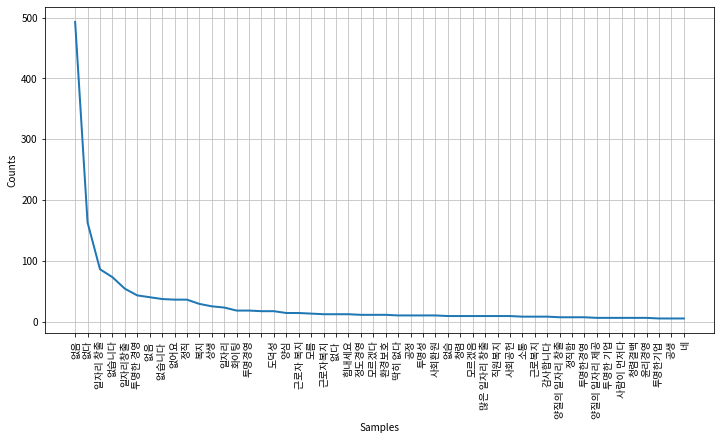

In [40]:
plt.figure(figsize=(12,6))
test.plot(50)
plt.show()

### CountVectorizer / 단어빈도

In [16]:
count_vect = CountVectorizer()
count_vect.fit(df['Q9t1'].values)
count_vect.vocabulary_

{'비정규직': 3044,
 '정규직': 5378,
 '채용': 5989,
 '해주시': 6792,
 '많은': 2130,
 '복리': 2828,
 '후생': 7011,
 '챙겨주세요': 6013,
 '경제': 429,
 '억압': 4215,
 '개선': 316,
 '소비자': 3477,
 '중심': 5728,
 '생각': 3298,
 '없음': 4332,
 '발전': 2585,
 '기여': 834,
 '하도록': 6542,
 '힘써': 7091,
 '야한다고': 4118,
 '한다': 6639,
 '아니어도': 3880,
 '사람': 3126,
 '많다는': 2104,
 '근로자': 755,
 '너무': 1163,
 '기계': 793,
 '부품': 2943,
 '하지말고': 6611,
 '같이': 306,
 '회사': 6987,
 '키워': 6246,
 '나가는': 944,
 '하나': 6506,
 '해줬으면': 6823,
 '좋겠다': 5547,
 '어려움': 4181,
 '함께': 6686,
 '화이팅': 6930,
 '입니다': 5032,
 '바라는': 2473,
 '하면': 6556,
 '정말': 5390,
 '바꿀': 2455,
 '의지': 4769,
 '있는지': 5068,
 '의심': 4765,
 '스러': 3577,
 '조금': 5479,
 '혜택': 6915,
 '복지': 2832,
 '지었': 5815,
 '죄값': 5594,
 '받자': 2573,
 '이익': 4892,
 '바라보지말고': 2483,
 '피해': 6456,
 '보상': 2776,
 '적극': 5298,
 '적이었음': 5318,
 '좋겠습니다': 5554,
 '래야': 1956,
 '신뢰': 3671,
 '생깁니다': 3315,
 '성실한': 3403,
 '납세': 1085,
 '없습니다': 4295,
 '이윤': 4891,
 '추구': 6122,
 '이닌': 4811,
 '삶도': 3243,
 '돌아보실': 1633,
 '있으면': 5098,
 '딱히': 1907,
 '